# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME**, **YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 25

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the train data
train_data = pd.read_csv('df_train.csv')
# load the test data
test_data = pd.read_csv('df_test.csv') 

#Display top 5 rows 
display (train_data.head())
display (test_data.head())

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
train_data.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [4]:
#checking for non-values
train_data.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

This confirms that there is **2068** null values in the `valencia_pressure` feature.

In [5]:
# Checking Skewness/Kurtosis and Outliers
train_data.skew(numeric_only=True)

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The features `Bilbao_snow_3h`, `Barcelona_pressure`, `Seville_rain_3h`, `Barcelona_rain_3h` and `Valencia_snow_3h` are highly skewed. `Madrid_weather_id`, `Barcelona_weather_id` and `Seville_weather_id` have high negative symmetry. This is indictive of outliers in our data.

<Axes: >

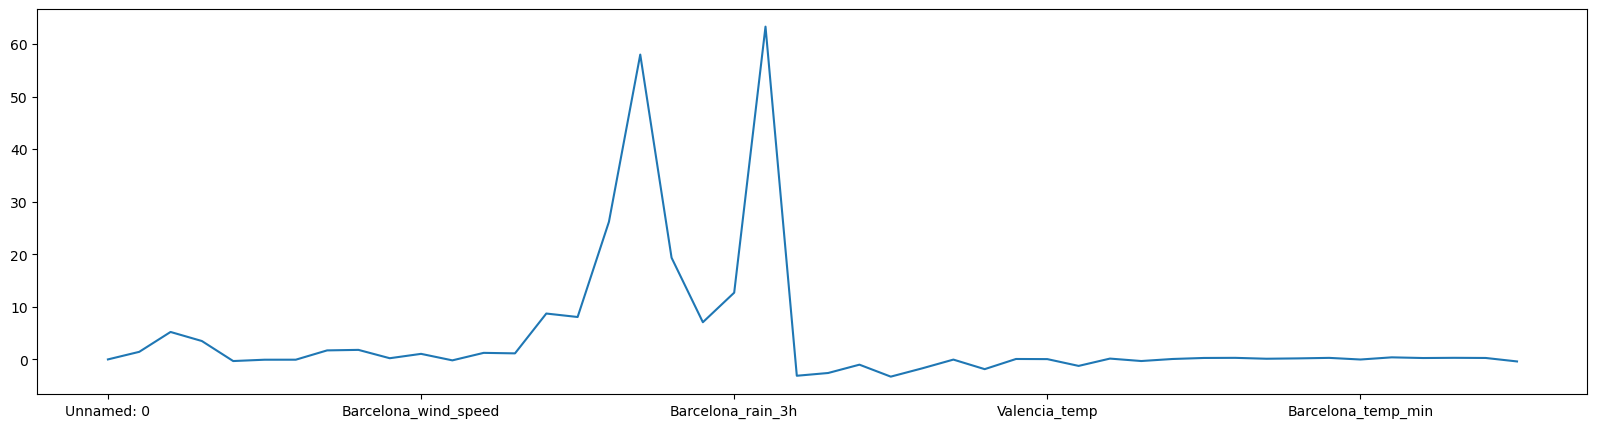

In [68]:
#Checking for outliers
plt.figure(figsize = [20,5])
train_data.skew(axis=0, skipna=True, numeric_only=True).plot()

In [6]:
# - The kurtosis of the data in train_data
train_data.kurtosis(numeric_only=True)

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with large numbers of outliers as shown by **kurtosis > 3**. These features are `Bilbao_rain_1h`, `Valencia_wind_speed`, `Barcelona_rain_1h`, `Seville_rain_1h`, `Bilbao_snow_3h`, `Barcelona_pressure`, `Seville_rain_3h`, `Valencia_snow_3h`, `Barcelona_rain_3h`, `Madrid_weather_id`, `Barcelona_weather_id` and `Seville_weather_id`.
The `Barcelona_pressure` feature had an outlier of 3687.564230 which is too high given that the maximum pressure recorded is 1084, and the maximum pressure for the other cities below this value. `Valencia_wind_speed` has a max of 52 while the highest wind speed recorded in was 20. 

#Plot relevant feature interactions:

In [74]:
#Ploting  Load_shortfall_3h against time 
fig = px.line(train_data, y = train_data['load_shortfall_3h'], x =train_data['time'],title = 'Load shortfall over time', width =900, height=400 )
fig.show()

In [75]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.month])['load_shortfall_3h'].mean(),
        title = 'Load shortfall grouped by Month of Year',
        y='load_shortfall_3h', width =800, height=400)

The above plot shows a peaks in the 'load short fall' during month of **June** and **October**.

In [77]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.isocalendar().week])['load_shortfall_3h'].mean(), 
        title = 'Load shortfall grouped by Week of the Year', y='load_shortfall_3h', width =700, height=400)

The above plot shows a peaks in the 'load short fall' during by week.

In [78]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.dayofyear])['load_shortfall_3h'].mean(), 
        title = 'Load shortfall grouped by Day of the Year', y='load_shortfall_3h', width =700, height=400)

The minimum load_short_fall_3h was **1,862k** and the maximum was **17,306k** from the day of year plot.

In [79]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.dayofweek])['load_shortfall_3h'].mean(), 
        title = 'Load shortfall grouped by Day of the Week', y='load_shortfall_3h', width =800, height=400 )

Here we see a decrease in the Load_short_fall_3h on **Fridays** and **Saturdays**.

In [80]:
px.line(train_data.groupby([train_data['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].mean(), 
        title = 'Load shortfall grouped by Hour of Day', y='load_shortfall_3h', width =800, height=400 )

The plot shows an increase in the Load_short_fall_3h each day after **10 hours**.

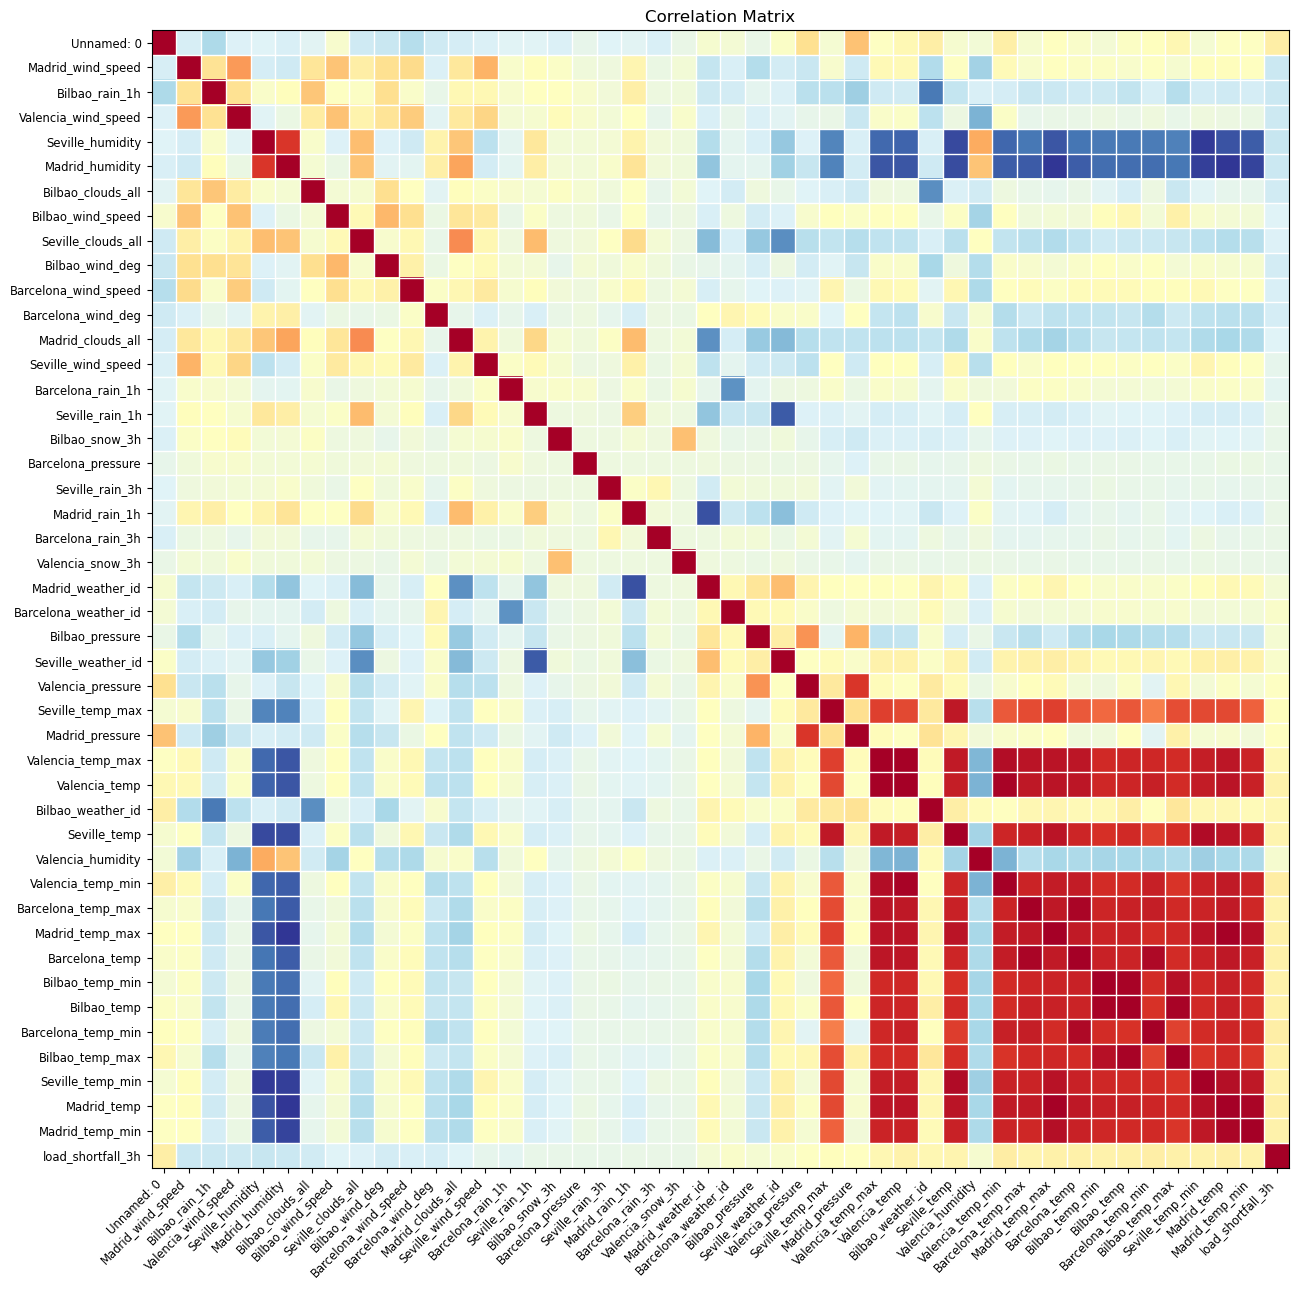

In [14]:
# evaluate correlation
fig = plt.figure(figsize=(50,13));
ax = fig.add_subplot(111);
plot_corr(train_data.corr(numeric_only=True), xnames = train_data.corr(numeric_only=True).columns, ax = ax, );

The features with a high correlation are shown in red on the heatmap at bottom right corner of our matrix.

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

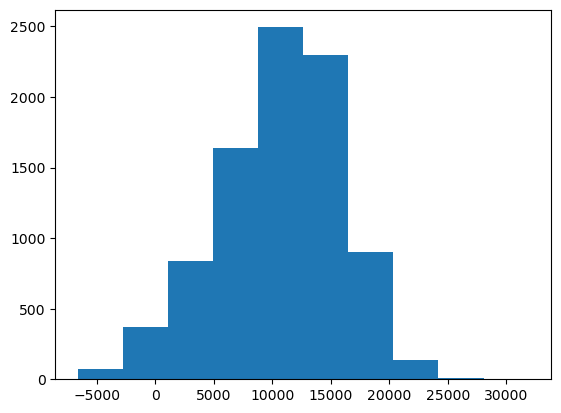

In [82]:
# have a look at feature distributions
plt.hist(train_data['load_shortfall_3h'])

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [18]:
# remove missing values/ features
train_data['Valencia_pressure'].fillna(train_data['Valencia_pressure'].mean(), inplace = True)

In [19]:
# convert catogorical features to numeric
train_data['Valencia_wind_deg'] = train_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
train_data['Seville_pressure'] = train_data['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [20]:
# create new features

train_data['Year']  = train_data['time'].astype('datetime64[ns]').dt.year
train_data['Month_of_year']  = train_data['time'].astype('datetime64[ns]').dt.month
train_data['Week_of_year'] = train_data['time'].astype('datetime64[ns]').dt.isocalendar().week
train_data['Day_of_year']  = train_data['time'].astype('datetime64[ns]').dt.dayofyear
train_data['Day_of_month']  = train_data['time'].astype('datetime64[ns]').dt.day
train_data['Day_of_week'] = train_data['time'].astype('datetime64[ns]').dt.dayofweek
train_data['Hour_of_week'] = ((train_data['time'].astype('datetime64[ns]').dt.dayofweek) * 24 + 24) - (24 - train_data['time'].astype('datetime64[ns]').dt.hour)
train_data['Hour_of_day']  = train_data['time'].astype('datetime64[ns]').dt.hour

<Axes: >

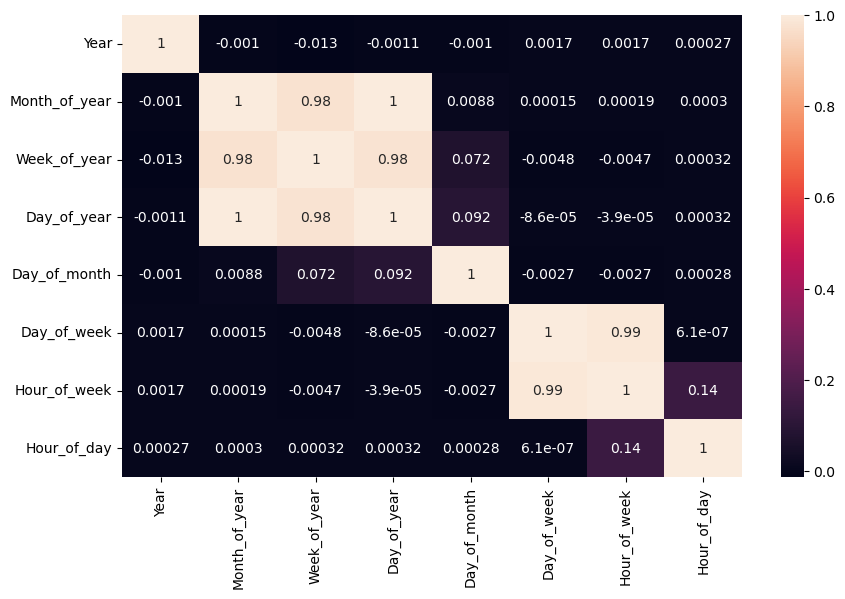

In [21]:
#correlation between our newly created features
Time_df = train_data.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

It seems high Multicollinearity is present in our new features `Week of the year` , `Day of the year`,
`Month of the year`,`Day of the week` and `Hour of the week`. In this instance we have to drop features with a high correlation.

#Engineer existing features

In [22]:
#dropping features
train_data = train_data.drop(columns=['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0','time'])

In [25]:
#Performing Feature selection 
X = train_data.drop(columns = 'load_shortfall_3h')
y = train_data['load_shortfall_3h'].astype('int')

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) 

,Features,Score
22,Valencia_snow_3h,3110.383507
37,Madrid_temp_max,2281.817118
44,Madrid_temp,2106.588763
45,Madrid_temp_min,2054.920443
28,Seville_temp_max,1847.097423
43,Seville_temp_min,1589.866015
33,Seville_temp,1483.057026
30,Valencia_temp_max,1365.685590
36,Barcelona_temp_max,1260.724182
31,Valencia_temp,1229.799250


In [26]:
#Removing outliers
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [27]:
#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity,Year,Month_of_year,Day_of_month,Day_of_week,Hour_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,0.352274,-1.129531e+00,-2.616796,0.649842,0.540928,-1.226179,-1.602429,-1.675368,-0.00274,-1.090901
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,0.352274,-9.289340e-01,-2.539014,0.649842,0.298645,-1.226179,-1.602429,-1.675368,-0.00274,-0.654451
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,0.352274,-8.085757e-01,-2.105564,0.649842,0.021750,-1.226179,-1.602429,-1.675368,-0.00274,-0.218001
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,0.352274,-3.672620e-01,-1.361703,0.649842,-0.583957,-1.226179,-1.602429,-1.675368,-0.00274,0.218449
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,0.352274,1.368315e-14,-1.348214,0.649842,-0.358980,-1.226179,-1.602429,-1.675368,-0.00274,0.654899


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In this section, we will split the data into train and test in order to evaluate the models on the train data.
We will build a `Multiple linear regression model`, look at a `Support Vector Regressor` and evalaute other models like `decision tree`, `Random Forest`,`Lasso` and `Ridge`.

In [28]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [29]:
#Multiple linear regression model
lm = LinearRegression()

#Fit the model into training set
lm.fit(X_train, y_train)

#predicting on the unseen data
predict = lm.predict(X_test)

#Predicting on the training set
train_predict = lm.predict(X_train) 

In [30]:
import pickle

In [126]:
with open('LinearRegression.pkl', 'wb') as file:
    pickle.dump(lm, file)

In [31]:
# Lasso regression model 
lasso = Lasso(alpha=0.01)

# Train the model
lasso.fit(X_train, y_train)

# Predict
lasso_pred = lasso.predict(X_test)

In [127]:
with open('Lasso.pkl', 'wb') as file:
    pickle.dump(lasso, file)

In [32]:
# Ridge model
Ridge = Ridge()

# Train the model
Ridge.fit(X_train, y_train)

# Predict
Ridge_pred = Ridge.predict(X_test)

In [128]:
with open('Ridge_model.pkl', 'wb') as file:
    pickle.dump(Ridge, file)

In [33]:
#Support Vector Regressor
Sv_reg = SVR(kernel='rbf', gamma='auto')

# Train the model
Sv_reg.fit(X_train,y_train)

# Predict
SV_pred = Sv_reg.predict(X_test)

In [129]:
with open('Vector_Regressor.pkl', 'wb') as file:
    pickle.dump(Sv_reg, file)

In [34]:
# Decision Tree Model
Reg_tree = DecisionTreeRegressor(random_state=42)

# Fitting the model
Reg_tree.fit(X_train,y_train)

# Predict
Tree_pred = Reg_tree.predict(X_test)

In [132]:
with open('Reg_tree.pkl', 'wb') as file:
    pickle.dump(Reg_tree, file)

In [35]:
# Random Forest model
RF = RandomForestRegressor(n_estimators=200, max_depth=8)

# Fitting the model
RF.fit(X_train,y_train)

#Predict
RF_predict = RF.predict(X_test)

In [135]:
with open('Random_Forest.pkl', 'wb') as file:
    pickle.dump(RF, file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In this section , we will evaluate the performance of the models we've trained using the following metrics:
* Root Mean Squared Error (RMSE)
* Mean Squared Error (MSE)
* Mean Absolute Error (MAE)
* Residual Sum of Squares Error (RSS)

In [44]:
# Compare model performance
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Las = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridg = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Deci = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [45]:
print('Linear Model \n')
print(Linear.head())  
print('\n')
print('Lasso Model \n')
print(Las.head())
print('\n')
print('Ridge Model \n')
print(Ridg.head()) 
print('\n')
print('SVR Model \n')
print(Sv.head()) 
print('\n')
print('Decision Tree Model \n')
print(Deci.head()) 
print('\n')
print('Random Forest Model \n')
print(Rand.head())

Linear Model 

      Actual     Predicted
1226   11450  12402.636182
7903   13693  12245.041069
1559   18337  11989.975721
3621   -1221   9383.384417
7552    8515  14086.322696


Lasso Model 

      Actual     Predicted
1226   11450  12402.596545
7903   13693  12245.032510
1559   18337  11989.974822
3621   -1221   9383.406078
7552    8515  14086.234318


Ridge Model 

      Actual     Predicted
1226   11450  12402.251854
7903   13693  12244.719235
1559   18337  11990.023803
3621   -1221   9383.425692
7552    8515  14085.757950


SVR Model 

      Actual     Predicted
1226   11450  11119.964057
7903   13693  11106.784848
1559   18337  11211.627698
3621   -1221  11021.139113
7552    8515  11220.062862


Decision Tree Model 

      Actual  Predicted
1226   11450     8593.0
7903   13693    11016.0
1559   18337    18497.0
3621   -1221      934.0
7552    8515    10368.0


Random Forest Model 

      Actual     Predicted
1226   11450   7505.688638
7903   13693  16873.884492
1559   18337  1426

In [47]:
# Choose best model and motivate why it is the best choice
Model_comp = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_comp = pd.DataFrame(data=Model_comp)
Model_comp

,Test RMSE
Decision Tree,3871.701641
Lasso,4845.428409
Linear model,4845.426919
Random Forest,3349.214285
Ridge,4845.426261
SVR,5294.969170


In [48]:
#Root Mean Squared Error (RMSE)
px.bar(Model_comp, y =Model_comp['Test RMSE'],
       color = Model_comp.index, width =800, height=400)

In [49]:
# Mean Squared Error (MSE)
Model_comp2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_comp2 = pd.DataFrame(data=Model_comp2)
Model_comp2

,Test MSE
Decision Tree,1.499007e+07
Lasso,2.347818e+07
Linear model,2.347816e+07
Random Forest,1.121724e+07
Ridge,2.347816e+07
SVR,2.803670e+07


In [51]:
px.bar(Model_comp2, y =Model_comp2['Test MSE'],
       color = Model_comp2.index, width =800, height=400)

In [52]:
# Mean Absolute Error (MAE)
Model_comp3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_comp3 = pd.DataFrame(data=Model_comp3)
Model_comp3

,Test MAE
Decision Tree,2795.033657
Lasso,3858.659602
Linear model,3858.656423
Random Forest,2647.290137
Ridge,3858.663652
SVR,4227.299991


In [53]:
px.bar(Model_comp3, y =Model_comp3['Test MAE'],
       color = Model_comp3.index, width =800, height=400)

In [54]:
#Residual Sum of Squares Error (RSS)
Model_comp4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_comp4 = pd.DataFrame(data=Model_comp4)
Model_comp4

,Test R^2
Decision Tree,0.467724
Lasso,0.166323
Linear model,0.166324
Random Forest,0.601692
Ridge,0.166324
SVR,0.004456


In [55]:
px.bar(Model_comp4, y =Model_comp4['Test R^2'],
       color = Model_comp4.index, width =800, height=400)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Based on the results of the performance metrics, we can confirm that the random forest model was the best performing model. The Random Forest model had a higher R2 for our test data compared to other models and a lower RMSE for both training and test data. It has met all expectations for a regression model. We will go ahead and use the Random Rorest model to predict the 3 hourly load shortfall in spain.

In [56]:
test_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [57]:
# create new feautures for our test data
test_data['Year']  = test_data['time'].astype('datetime64').dt.year
test_data['Month_of_year']  = test_data['time'].astype('datetime64').dt.month
test_data['Week_of_year'] = test_data['time'].astype('datetime64').dt.isocalendar().week
test_data['Day_of_year']  = test_data['time'].astype('datetime64').dt.dayofyear
test_data['Day_of_month']  = test_data['time'].astype('datetime64').dt.day
test_data['Day_of_week'] = test_data['time'].astype('datetime64').dt.dayofweek
test_data['Hour_of_week'] = ((test_data['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - test_data['time'].astype('datetime64').dt.hour)
test_data['Hour_of_day']  = test_data['time'].astype('datetime64').dt.hour
time = test_data['time']

In [58]:
#Fill missing values
test_data['Valencia_pressure'].fillna(test_data['Valencia_pressure'].mean(), inplace = True)

In [60]:
#outliers
test_data = test_data[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

In [61]:
#convert catagorical features to numeric
test_data['Valencia_wind_deg'] = test_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
test_data['Seville_pressure'] = test_data['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [62]:
#predict
test_data['load_shortfall_3h'] = RF.predict(test_data)

In [63]:
test_data['time'] = time
load = test_data[['time','load_shortfall_3h']]
load.to_csv('submission1_load_shortfall.csv', index = False)
load

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8017.695732
1,2018-01-01 03:00:00,10713.209676
2,2018-01-01 06:00:00,10984.529346
3,2018-01-01 09:00:00,10604.178563
4,2018-01-01 12:00:00,10879.071027
...,...,...
2915,2018-12-31 09:00:00,12936.974674
2916,2018-12-31 12:00:00,13018.450971
2917,2018-12-31 15:00:00,12555.715230
2918,2018-12-31 18:00:00,12603.669432
